<div style="
    background: linear-gradient(135deg, #1e3c72, #2a5298);
    font-family: Calibri, sans-serif;
    font-size: 2.5em;
    color: #FF7F50;
    font-weight: bold;
    text-align: center;
    border-radius: 12px;
    padding: 0px 0px;
    margin-top: 0px;
    margin: 0px;
    border: 5px solid #FF7F50;
    box-shadow: 0 4px 10px rgba(0,0,0,0.1);
">
    Projet IA & ML
    <br/>
    Prédire les clients qui vont résilier leur abonnement
    <br/>
</div>


<div style="
    width: 40%;
    margin: 0px auto;
    background: linear-gradient(135deg, #1e3c72, #2a5298);
    font-family: Calibri, sans-serif;
    font-size: 1.5em;
    color: #FF7F50;
    font-weight: bold;
    text-align: center;
    border-radius: 12px;
    border: 5px solid #FF7F50;
    padding: 0px 0px;
    box-shadow: 0 4px 0px rgba(0,0,0,0.1);
">
    Imports
</div>

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix,
    classification_report,
)
# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Imbalanced data handling
from imblearn.over_sampling import SMOTE
# Pipelines
from sklearn.pipeline import make_pipeline
# LIME (Model interpretability)
import lime
import lime.lime_tabular

In [28]:
import warnings
warnings.filterwarnings('ignore')

<div style="
    width: 40%;
    margin: 0px auto;
    background: linear-gradient(135deg, #1e3c72, #2a5298);
    font-family: Calibri, sans-serif;
    font-size: 1.5em;
    color: #FF7F50;
    font-weight: bold;
    text-align: center;
    border-radius: 12px;
    border: 5px solid #FF7F50;
    padding: 0px 0px;
    box-shadow: 0 4px 0px rgba(0,0,0,0.1);
">
    Étape 1 : Préparation des données
</div>

In [14]:
df = pd.read_csv("churn_clients.csv")
df.head()

,Age,Revenu,Sexe,Anciennete,Frequence_utilisation,Support_contacte,Score_satisfaction,Resilie
0,56,4343,Femme,8,23,Oui,2,0
1,69,5070,Homme,9,26,Oui,2,0
2,46,1580,Femme,8,10,Non,3,0
3,32,8004,Homme,9,29,Oui,3,0
4,60,9130,Homme,9,1,Non,1,0


In [15]:
print("Nombre total de clients :", df.shape[0])

Nombre total de clients : 500


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    500 non-null    int64 
 1   Revenu                 500 non-null    int64 
 2   Sexe                   500 non-null    object
 3   Anciennete             500 non-null    int64 
 4   Frequence_utilisation  500 non-null    int64 
 5   Support_contacte       500 non-null    object
 6   Score_satisfaction     500 non-null    int64 
 7   Resilie                500 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 31.4+ KB


In [17]:
df.isnull().sum()

Age                      0
Revenu                   0
Sexe                     0
Anciennete               0
Frequence_utilisation    0
Support_contacte         0
Score_satisfaction       0
Resilie                  0
dtype: int64

In [18]:
# Sélection des colonnes à normaliser
colonnes_a_normaliser = ['Age', 'Revenu', 'Anciennete', 'Frequence_utilisation', 'Score_satisfaction']
# Initialiser le scaler
scaler = StandardScaler()
# Appliquer la normalisation
df[colonnes_a_normaliser] = scaler.fit_transform(df[colonnes_a_normaliser])

In [19]:
# Encodage manuel
df['Sexe'] = df['Sexe'].map({'Homme': 0, 'Femme': 1})
df['Support_contacte'] = df['Support_contacte'].map({'Non': 0, 'Oui': 1})

In [20]:
print(df.head())
print(df.info())

        Age    Revenu  Sexe  Anciennete  Frequence_utilisation  \
0  0.784233 -0.518679     1    1.204281               1.068220   
1  1.649686 -0.230483     0    1.546601               1.417540   
2  0.118500 -1.613983     1    1.204281              -0.445499   
3 -0.813526  0.932610     0    1.546601               1.766860   
4  1.050527  1.378977     0    1.546601              -1.493459   

   Support_contacte  Score_satisfaction  Resilie  
0                 1           -1.240248        0  
1                 1           -1.240248        0  
2                 0           -0.886296        0  
3                 1           -0.886296        0  
4                 0           -1.594201        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    500 non-null    float64
 1   Revenu                 500 non-n

<div style="
    width: 40%;
    margin: 0px auto;
    background: linear-gradient(135deg, #1e3c72, #2a5298);
    font-family: Calibri, sans-serif;
    font-size: 1.5em;
    color: #FF7F50;
    font-weight: bold;
    text-align: center;
    border-radius: 12px;
    border: 5px solid #FF7F50;
    padding: 0px 0px;
    box-shadow: 0 4px 0px rgba(0,0,0,0.1);
">
    Étape 2 : Visualisation des données
</div>

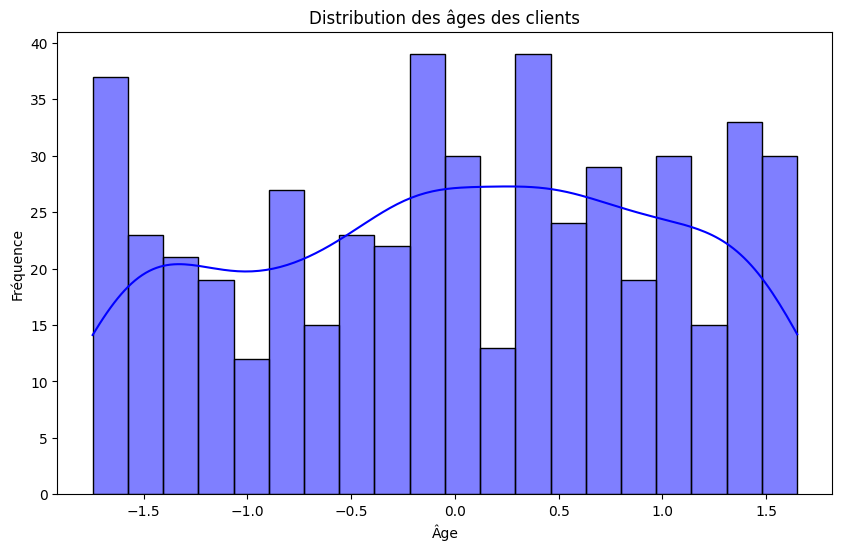

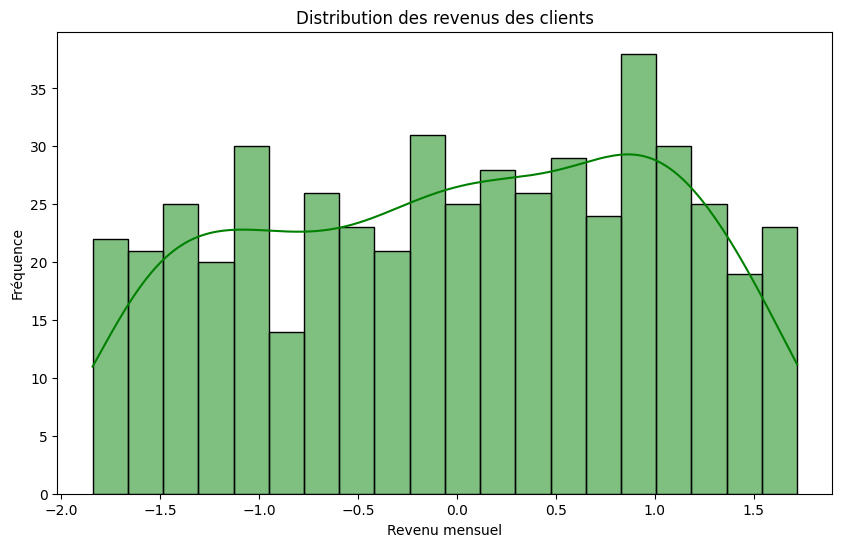

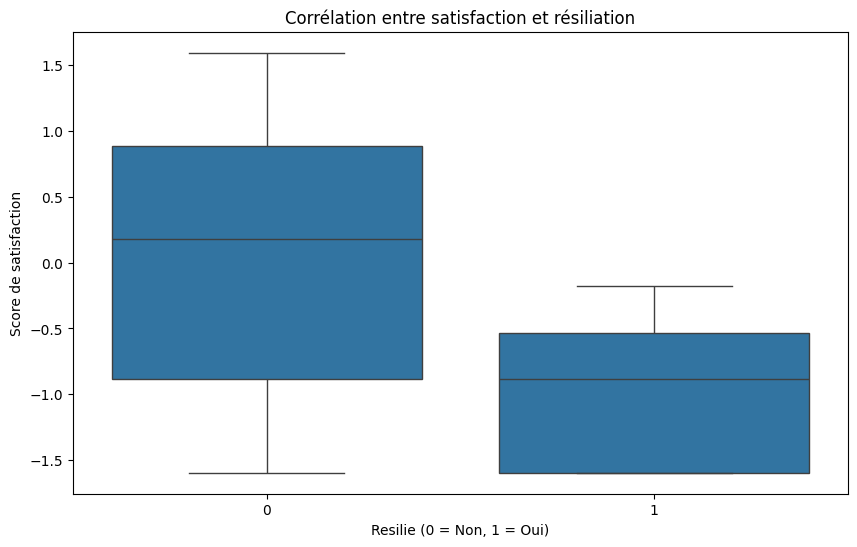

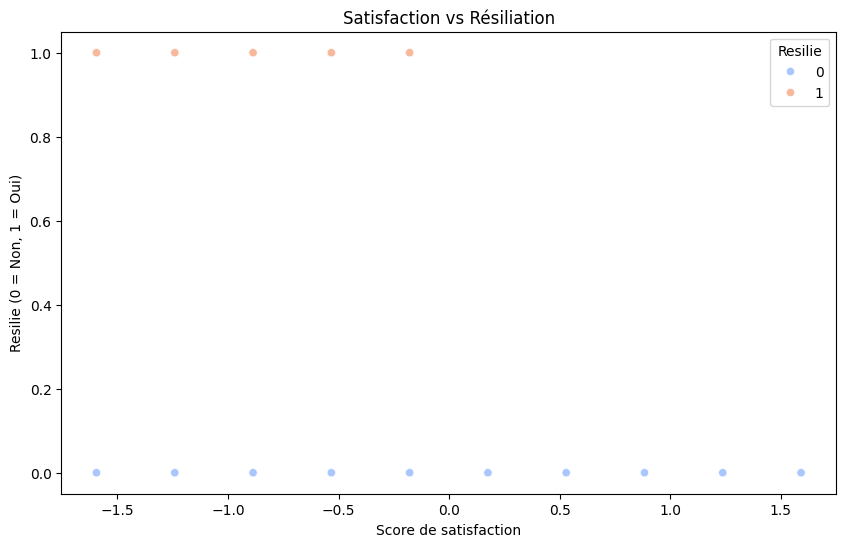

In [21]:
# Histogramme de l'âge
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title("Distribution des âges des clients")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()

# Histogramme du revenu
plt.figure(figsize=(10, 6))
sns.histplot(df['Revenu'], bins=20, kde=True, color='green')
plt.title("Distribution des revenus des clients")
plt.xlabel("Revenu mensuel")
plt.ylabel("Fréquence")
plt.show()

# Boxplot entre satisfaction et résiliation
plt.figure(figsize=(10, 6))
sns.boxplot(x='Resilie', y='Score_satisfaction', data=df)
plt.title("Corrélation entre satisfaction et résiliation")
plt.xlabel("Resilie (0 = Non, 1 = Oui)")
plt.ylabel("Score de satisfaction")
plt.show()

# Scatterplot entre satisfaction et résiliation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Score_satisfaction', y='Resilie', data=df, hue='Resilie', palette="coolwarm")
plt.title("Satisfaction vs Résiliation")
plt.xlabel("Score de satisfaction")
plt.ylabel("Resilie (0 = Non, 1 = Oui)")
plt.show()

In [24]:
# Séparer les variables explicatives (X) et la variable cible (y)
X = df.drop('Resilie', axis=1)  # Variables explicatives (tout sauf la colonne 'Résilié')
y = df['Resilie']  # Variable cible (la colonne 'Résilié')

# Séparer les données en 80% pour l'entraînement et 20% pour le test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Nombre de données d'entraînement : {X_train.shape[0]}")
print(f"Nombre de données de test : {X_test.shape[0]}")

Nombre de données d'entraînement : 400
Nombre de données de test : 100


<div style="
    width: 50%;
    margin: 0px auto;
    background: linear-gradient(135deg, #1e3c72, #2a5298);
    font-family: Calibri, sans-serif;
    font-size: 1.5em;
    color: #FF7F50;
    font-weight: bold;
    text-align: center;
    border-radius: 12px;
    border: 5px solid #FF7F50;
    padding: 0px 0px;
    box-shadow: 0 4px 0px rgba(0,0,0,0.1);
">
    Étape 3 : Création, test et évaluation de Modeles
</div>

In [25]:
# Modèles
models = {
    "Régression logistique": LogisticRegression(),
    "Arbre de décision": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Entraînement et évaluation
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{model_name}:")
    print("Précision:", precision_score(y_test, y_pred))
    print("Rappel:", recall_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))
    print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred))


Régression logistique:
Précision: 0.8
Rappel: 1.0
F1-score: 0.8888888888888888
Matrice de confusion:
 [[95  1]
 [ 0  4]]

Arbre de décision:
Précision: 1.0
Rappel: 1.0
F1-score: 1.0
Matrice de confusion:
 [[96  0]
 [ 0  4]]

KNN:
Précision: 1.0
Rappel: 1.0
F1-score: 1.0
Matrice de confusion:
 [[96  0]
 [ 0  4]]


<div style="
    width: 50%;
    margin: 0px auto;
    background: linear-gradient(135deg, #1e3c72, #2a5298);
    font-family: Calibri, sans-serif;
    font-size: 1.5em;
    color: #FF7F50;
    font-weight: bold;
    text-align: center;
    border-radius: 12px;
    border: 5px solid #FF7F50;
    padding: 0px 0px;
    box-shadow: 0 4px 0px rgba(0,0,0,0.1);
">
    Étape 4 : Amélioration du Modele
</div>

In [26]:
# Définir les paramètres à tester pour KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]  # p=1 pour la distance Manhattan, p=2 pour la distance Euclidienne
}

# Initialiser le modèle KNN
knn = KNeighborsClassifier()

# GridSearchCV pour optimiser les paramètres
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X, y)

# Affichage des meilleurs résultats
print("Meilleur score F1 :", grid_search.best_score_)
print("Meilleurs paramètres :", grid_search.best_params_)

# Prédictions sur le set de test
y_pred = grid_search.best_estimator_.predict(X_test)

# Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

Meilleur score F1 : 0.6730158730158728
Meilleurs paramètres : {'metric': 'manhattan', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}

Rapport de classification :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00         4

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [29]:
# Séparation des variables
X = df.drop("Resilie", axis=1)
y = df["Resilie"]

# Application de SMOTE pour équilibrer les classes
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Normalisation des données
scaler = StandardScaler()
X_res = scaler.fit_transform(X_res)

# Séparer les données en train et test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Paramètres à tester pour KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan'],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 pour la distance Manhattan, p=2 pour la distance Euclidienne
}

# Initialisation du modèle KNN
knn = KNeighborsClassifier()

# GridSearchCV pour optimiser les paramètres
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1')
grid_search_knn.fit(X_train, y_train)

# Affichage des meilleurs résultats
print("Meilleur score F1 avec SMOTE et KNN :", grid_search_knn.best_score_)
print("Meilleurs paramètres avec KNN :", grid_search_knn.best_params_)

# Prédictions sur le set de test
y_pred_knn = grid_search_knn.best_estimator_.predict(X_test)

# Rapport de classification
print("\nRapport de classification avec SMOTE et KNN :")
print(classification_report(y_test, y_pred_knn))


✅ Meilleur score F1 avec SMOTE et KNN : 0.9557817620711564
🔍 Meilleurs paramètres avec KNN : {'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

📊 Rapport de classification avec SMOTE et KNN :
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        93
           1       0.92      1.00      0.96        97

    accuracy                           0.95       190
   macro avg       0.96      0.95      0.95       190
weighted avg       0.96      0.95      0.95       190



In [30]:
# Définir les paramètres à tester pour RandomForest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialiser le modèle RandomForest
rf = RandomForestClassifier(random_state=42)

# GridSearchCV pour optimiser les paramètres
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_search_rf.fit(X, y)

# Affichage des meilleurs résultats
print("Meilleur score F1 pour RandomForest :", grid_search_rf.best_score_)
print("Meilleurs paramètres pour RandomForest :", grid_search_rf.best_params_)

# Prédictions sur le set de test
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)

# Rapport de classification
print("\n Rapport de classification (RandomForest) :")
print(classification_report(y_test, y_pred_rf))


✅ Meilleur score F1 pour RandomForest : 0.9777777777777779
🔍 Meilleurs paramètres pour RandomForest : {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

📊 Rapport de classification (RandomForest) :
              precision    recall  f1-score   support

           0       0.49      1.00      0.66        93
           1       0.00      0.00      0.00        97

    accuracy                           0.49       190
   macro avg       0.24      0.50      0.33       190
weighted avg       0.24      0.49      0.32       190



In [31]:
# Définir les paramètres à tester pour DecisionTree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'splitter': ['best', 'random']
}

# Initialiser le modèle DecisionTree
dt = DecisionTreeClassifier(random_state=42)

# GridSearchCV pour optimiser les paramètres
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='f1', n_jobs=-1)
grid_search_dt.fit(X, y)

# Affichage des meilleurs résultats
print("✅ Meilleur score F1 pour DecisionTree :", grid_search_dt.best_score_)
print("🔍 Meilleurs paramètres pour DecisionTree :", grid_search_dt.best_params_)

# Prédictions sur le set de test
y_pred_dt = grid_search_dt.best_estimator_.predict(X_test)

# Rapport de classification
print("\n📊 Rapport de classification (DecisionTree) :")
print(classification_report(y_test, y_pred_dt))


✅ Meilleur score F1 pour DecisionTree : 1.0
🔍 Meilleurs paramètres pour DecisionTree : {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}

📊 Rapport de classification (DecisionTree) :
              precision    recall  f1-score   support

           0       0.49      1.00      0.66        93
           1       0.00      0.00      0.00        97

    accuracy                           0.49       190
   macro avg       0.24      0.50      0.33       190
weighted avg       0.24      0.49      0.32       190



<div style="
    width: 50%;
    margin: 0px auto;
    background: linear-gradient(135deg, #1e3c72, #2a5298);
    font-family: Calibri, sans-serif;
    font-size: 1.5em;
    color: #FF7F50;
    font-weight: bold;
    text-align: center;
    border-radius: 12px;
    border: 5px solid #FF7F50;
    padding: 0px 0px;
    box-shadow: 0 4px 0px rgba(0,0,0,0.1);
">
    Étape 5 : Feature Engineering, PCA
</div>

In [39]:
# Ajout de nouvelles colonnes pour le feature engineering
df['Freq_per_year'] = df['Frequence_utilisation'] / (df['Anciennete'] + 1)
df['High_value_customer'] = ((df['Revenu'] > 50000) & (df['Frequence_utilisation'] > 10)).astype(int)

# Transformation de Age en groupes
df['Age_groupe'] = pd.cut(df['Age'], bins=[0, 25, 40, 60, 100], labels=['Jeune', 'Adulte', 'Senior', 'Très Senior'])

# Transformation de Score_satisfaction en catégories
df['Satisfaction_catégorie'] = pd.cut(df['Score_satisfaction'], bins=[0, 4, 7, 10], labels=['Mauvais', 'Moyen', 'Bon'])

# Encodage des variables catégorielles
df_encoded = pd.get_dummies(df, columns=['Sexe', 'Support_contacte', 'Age_groupe', 'Satisfaction_catégorie'], drop_first=True)

# Suppression de certaines colonnes pour tester l’impact
df_test = df_encoded.drop(columns=['Revenu', 'Score_satisfaction'])

# Séparer les features et la cible
X = df_test.drop('Resilie', axis=1)
y = df_test['Resilie']

# Application de SMOTE pour équilibrer les classes
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Normalisation des données
scaler = StandardScaler()
X_res = scaler.fit_transform(X_res)

# Séparer les données en train et test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Paramètres à tester pour KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan'],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 pour la distance Manhattan, p=2 pour la distance Euclidienne
}

# Initialisation du modèle KNN
knn = KNeighborsClassifier()

# GridSearchCV pour optimiser les paramètres
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1')
grid_search_knn.fit(X_train, y_train)

# Affichage des meilleurs résultats
print("✅ Meilleur score F1 avec SMOTE et KNN après feature engineering :", grid_search_knn.best_score_)
print("🔍 Meilleurs paramètres avec KNN après feature engineering :", grid_search_knn.best_params_)

# Prédictions sur le set de test
y_pred_knn = grid_search_knn.best_estimator_.predict(X_test)

# Rapport de classification
print("\n📊 Rapport de classification avec SMOTE et KNN après feature engineering :")
print(classification_report(y_test, y_pred_knn))


✅ Meilleur score F1 avec SMOTE et KNN après feature engineering : 0.9833549522542733
🔍 Meilleurs paramètres avec KNN après feature engineering : {'metric': 'euclidean', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}

📊 Rapport de classification avec SMOTE et KNN après feature engineering :
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        93
           1       0.93      1.00      0.97        97

    accuracy                           0.96       190
   macro avg       0.97      0.96      0.96       190
weighted avg       0.97      0.96      0.96       190



In [40]:
# 1. Normalisation des données
scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)

# 2. Appliquer PCA pour la réduction de dimensionnalité
# On peut choisir un nombre de composantes ou garder suffisamment de composantes pour expliquer une grande partie de la variance
pca = PCA(n_components=0.95)  # Conserver 95% de la variance

# Appliquer PCA à nos données d'entraînement
X_res_pca = pca.fit_transform(X_res_scaled)

# Affichage du nombre de composantes
print(f"Nombre de composantes principales après PCA : {X_res_pca.shape[1]}")
print(f"Proportion de variance expliquée par les composantes principales : {pca.explained_variance_ratio_.sum()}")

# 3. Séparer à nouveau en train et test
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_res_pca, y_res, test_size=0.2, random_state=42)

# 4. Paramètres à tester pour KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan'],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 pour la distance Manhattan, p=2 pour la distance Euclidienne
}

# 5. Initialisation du modèle KNN
knn = KNeighborsClassifier()

# 6. GridSearchCV pour optimiser les paramètres
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1')
grid_search_knn.fit(X_train_pca, y_train)

# 7. Affichage des meilleurs résultats
print("✅ Meilleur score F1 avec SMOTE, PCA et KNN :", grid_search_knn.best_score_)
print("🔍 Meilleurs paramètres avec KNN après PCA :", grid_search_knn.best_params_)

# 8. Prédictions sur le set de test
y_pred_knn = grid_search_knn.best_estimator_.predict(X_test_pca)

# 9. Rapport de classification
print("\n📊 Rapport de classification avec SMOTE, PCA et KNN après réduction de dimensionnalité :")
print(classification_report(y_test, y_pred_knn))


Nombre de composantes principales après PCA : 6
Proportion de variance expliquée par les composantes principales : 1.0
✅ Meilleur score F1 avec SMOTE, PCA et KNN : 0.9833549522542733
🔍 Meilleurs paramètres avec KNN après PCA : {'metric': 'euclidean', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}

📊 Rapport de classification avec SMOTE, PCA et KNN après réduction de dimensionnalité :
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        93
           1       0.93      1.00      0.97        97

    accuracy                           0.96       190
   macro avg       0.97      0.96      0.96       190
weighted avg       0.97      0.96      0.96       190



[[ 0.1783976  -0.91399512 -0.48547248 ...  0.          0.
   0.        ]
 [ 0.0842998   0.46981786  1.44151977 ...  0.          0.
   0.        ]
 [-0.39010574 -0.91399512 -0.45718687 ...  0.          0.
   0.        ]
 ...
 [-0.75077812 -0.77157958 -0.7476952  ...  0.          0.
   0.        ]
 [ 1.46916446  1.85363083 -1.21666952 ...  0.          0.
   0.        ]
 [ 0.01505656  2.19958407  0.30229579 ...  0.          0.
   0.        ]]
                  Feature  Importance
3           Freq_per_year    0.390071
1              Anciennete    0.344239
2   Frequence_utilisation    0.194141
5                  Sexe_1    0.045392
0                     Age    0.023336
6      Support_contacte_1    0.002821
4     High_value_customer    0.000000
7       Age_groupe_Adulte    0.000000
8       Age_groupe_Senior    0.000000
9  Age_groupe_Très Senior    0.000000


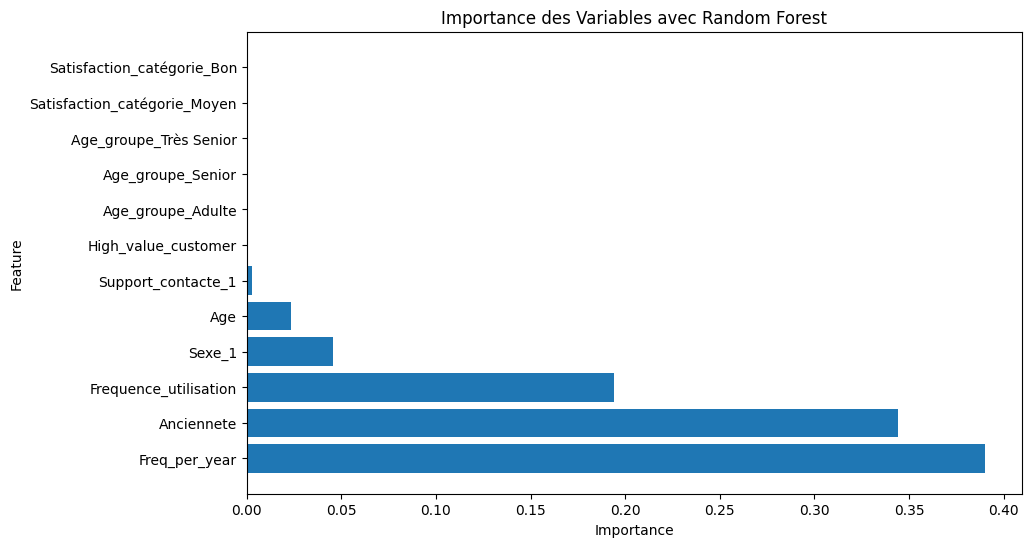

In [44]:

# Entraîner un modèle RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print(X_train)
# Obtenir l'importance des features
importances = rf.feature_importances_

# Créer un DataFrame avec les features et leurs importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Trier les features par importance décroissante
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Afficher les 10 features les plus importantes
print(feature_importances.head(10))

# Afficher l'importance des features sous forme de graphique
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Importance des Variables avec Random Forest')
plt.show()


<div style="
    width: 50%;
    margin: 0px auto;
    background: linear-gradient(135deg, #1e3c72, #2a5298);
    font-family: Calibri, sans-serif;
    font-size: 1.5em;
    color: #FF7F50;
    font-weight: bold;
    text-align: center;
    border-radius: 12px;
    border: 5px solid #FF7F50;
    padding: 0px 0px;
    box-shadow: 0 4px 0px rgba(0,0,0,0.1);
">
    Étape 6 : Sauvegarder les modeles 
</div>

In [42]:
import joblib
joblib.dump(knn, 'knn.pkl')
joblib.dump(rf, 'rf.pkl')

['rf.pkl']

<div style="
    width: 50%;
    margin: 0px auto;
    background: linear-gradient(135deg, #1e3c72, #2a5298);
    font-family: Calibri, sans-serif;
    font-size: 1.5em;
    color: #FF7F50;
    font-weight: bold;
    text-align: center;
    border-radius: 12px;
    border: 5px solid #FF7F50;
    padding: 0px 0px;
    box-shadow: 0 4px 0px rgba(0,0,0,0.1);
">
    Étape 7 : Interprétation des résultats 
</div>

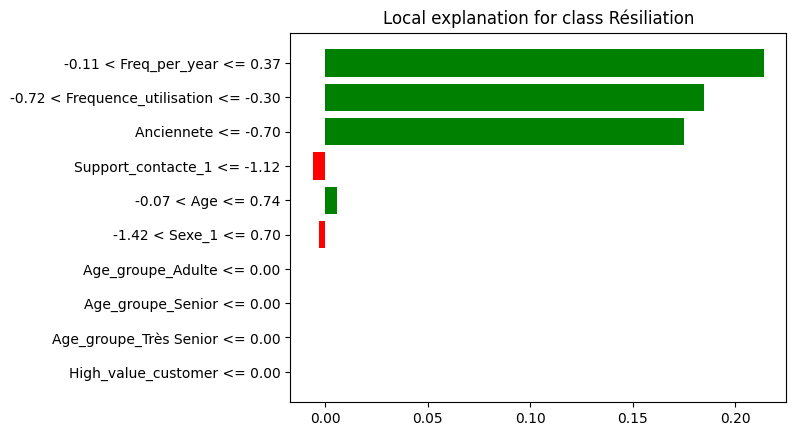

In [35]:
# Charger vos données
# X_train, y_train : Assurez-vous que ces variables sont définies (ce sont vos données d'entraînement et les étiquettes)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Entraîner un modèle RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Créer un explainable model avec LIME
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,
    training_labels=y_train,
    mode="classification",
    feature_names=X.columns,  # Assurez-vous d'utiliser les bons noms de colonnes
    class_names=["Non résiliation", "Résiliation"],  # Classes, ajustez si nécessaire
    discretize_continuous=True
)

# Choisir un exemple à expliquer (par exemple, le premier exemple de test)
i = 0  # Exemple 0, vous pouvez en choisir un autre
exp = explainer.explain_instance(X_train_scaled[i], rf.predict_proba, num_features=10)

# Affichage des résultats
exp.show_in_notebook(show_table=True, show_all=False)

# Optionnel : Affichage d'un graphique avec LIME
exp.as_pyplot_figure()
plt.show()


In [36]:
print(df.head(50))

         Age    Revenu  Sexe  Anciennete  Frequence_utilisation  \
0   0.784233 -0.518679     1    1.204281               1.068220   
1   1.649686 -0.230483     0    1.546601               1.417540   
2   0.118500 -1.613983     1    1.204281              -0.445499   
3  -0.813526  0.932610     0    1.546601               1.766860   
4   1.050527  1.378977     0    1.546601              -1.493459   
5  -1.279539 -0.596377     0    0.519641               1.184660   
6  -0.414086 -0.159524     0   -1.534277               0.369581   
7   0.784233 -1.178319     0    0.519641               1.650420   
8  -0.547232 -0.454063     0    1.546601               1.184660   
9  -0.280939  1.031318     0   -0.164998              -0.911259   
10 -1.079819 -0.756134     1    0.177322               1.068220   
11 -1.079819  0.212713     1    1.546601               0.020261   
12 -0.214366 -0.995174     1    0.519641              -0.445499   
13  0.584514  0.779196     1   -0.164998               0.36958

In [37]:
print(df['Resilie'].value_counts())


Resilie
0    475
1     25
Name: count, dtype: int64


In [38]:
print(df[df['Resilie'] == 1])


          Age    Revenu  Sexe  Anciennete  Frequence_utilisation  \
24  -0.414086 -0.016020     1   -1.191957              -0.561939   
27  -0.347513  0.486242     1   -1.534277              -0.794819   
75  -0.081219  0.854119     1   -1.534277              -1.027699   
104 -1.212965  0.371281     1   -1.534277              -1.609899   
122 -1.346112  0.824387     1   -1.191957              -1.609899   
152 -0.813526 -0.151992     1   -1.191957              -1.493459   
188 -1.079819  0.163161     0   -1.191957              -1.493459   
223  1.449966 -1.441541     1   -1.191957              -0.561939   
247 -0.214366  1.028147     1   -1.534277              -0.678379   
257 -1.212965 -0.488551     1   -1.534277              -0.794819   
271  1.649686 -0.506390     1   -1.191957              -0.561939   
292  1.649686  0.948070     1   -1.191957              -1.144139   
298 -1.479259 -0.425124     1   -1.191957              -0.561939   
299  0.651087  0.523109     0   -1.191957       